In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('../data/data_initial.xlsx', index_col=0)

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  396030
No. of columns:  27


In [7]:
# Checking the distribution of outcome labels -
df.loan_status.value_counts(normalize=True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  dti  

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
import sys
sys.path.append('../src')
import plots

In [11]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [12]:
df.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols, len(num_cols)

(Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object'),
 12)

In [14]:
df["issue_d"] = pd.to_datetime(df["issue_d"])
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])

In [15]:
date_cols = ["issue_d", "earliest_cr_line"]

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols, len(cat_cols)

(Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
        'home_ownership', 'verification_status', 'loan_status', 'purpose',
        'title', 'initial_list_status', 'application_type', 'address'],
       dtype='object'),
 13)

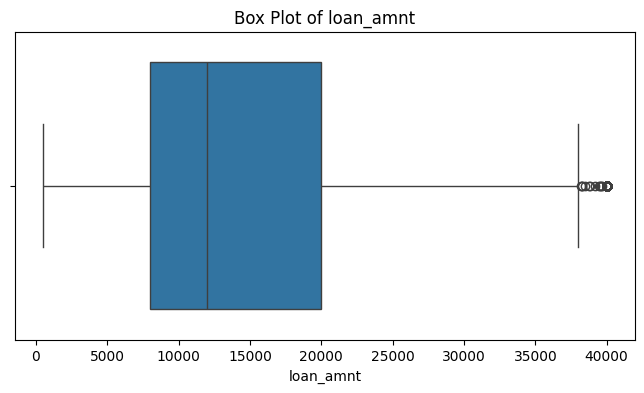

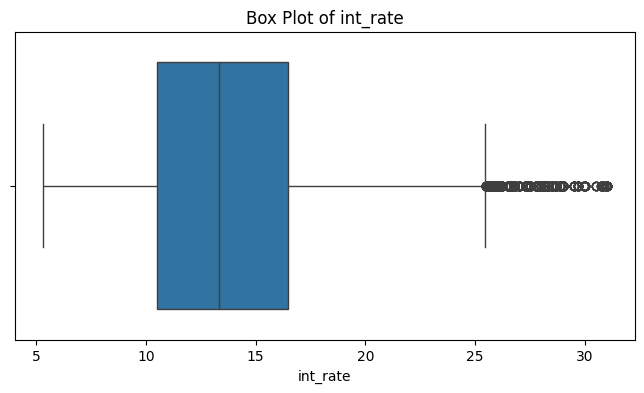

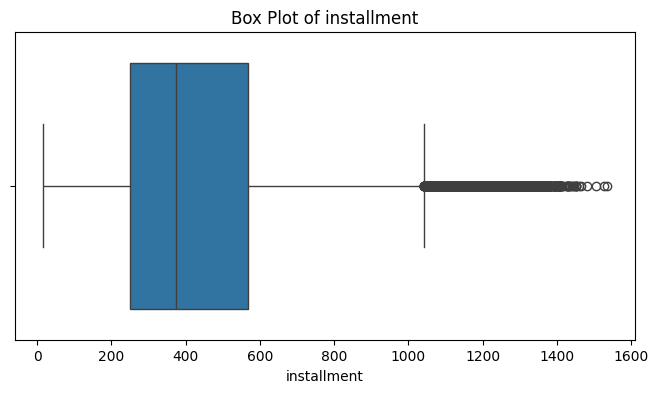

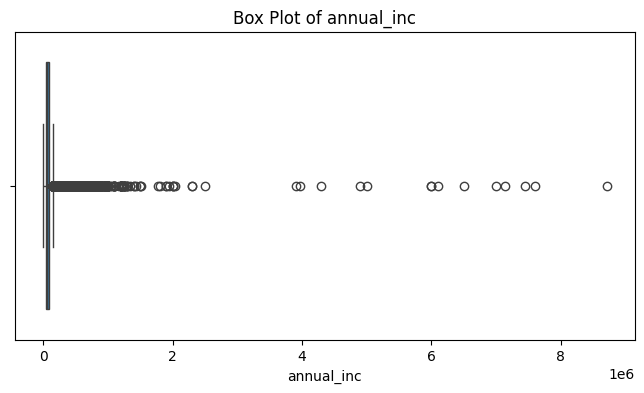

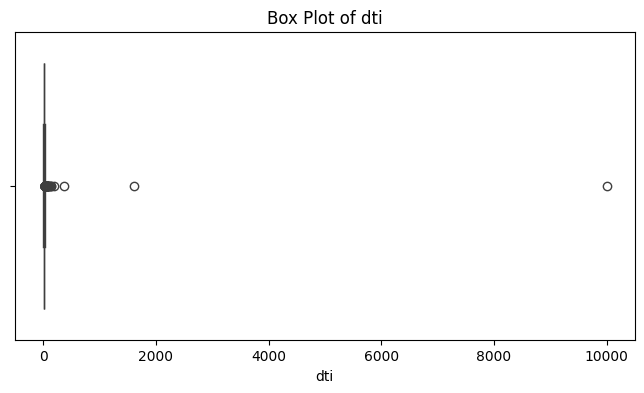

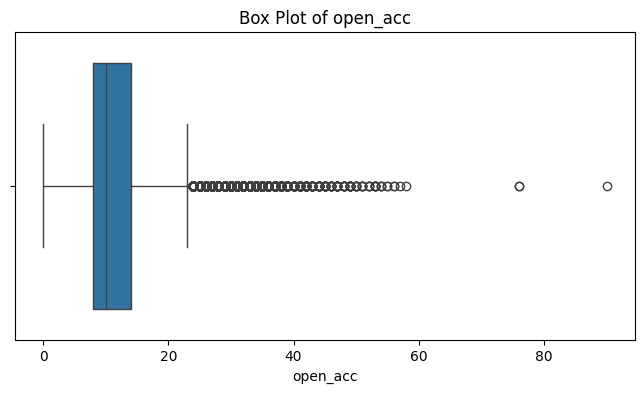

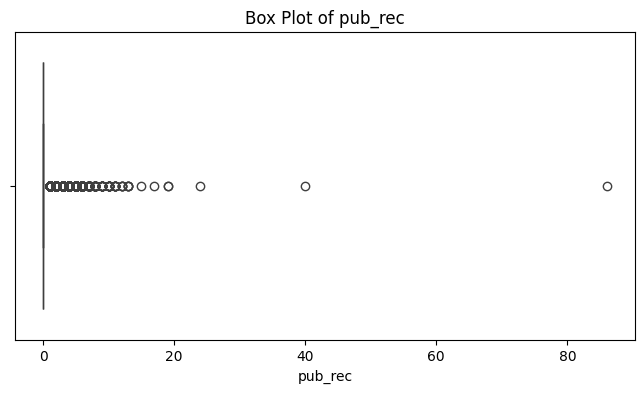

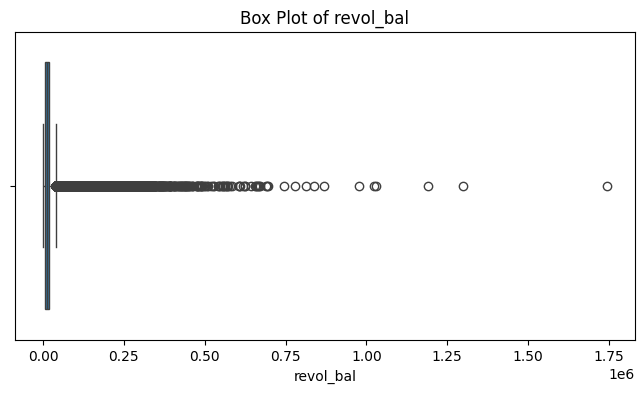

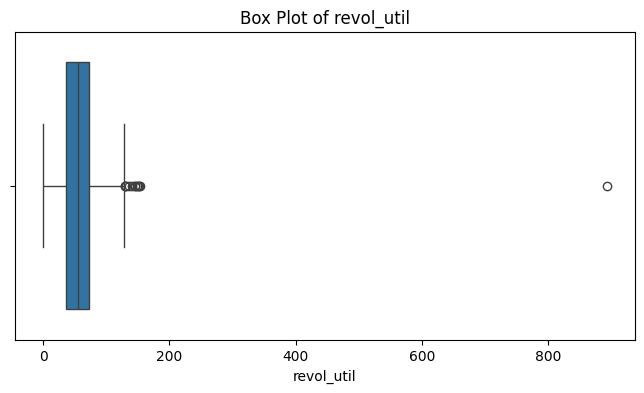

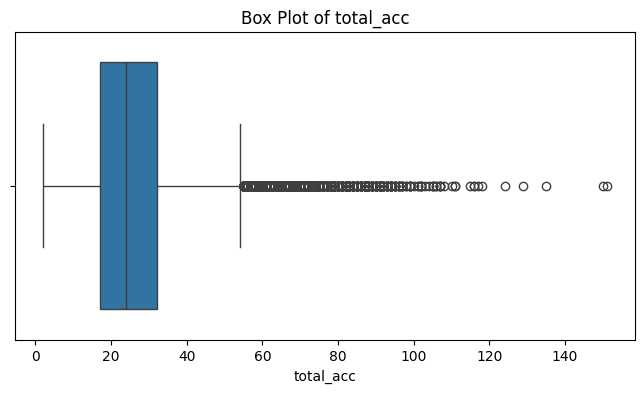

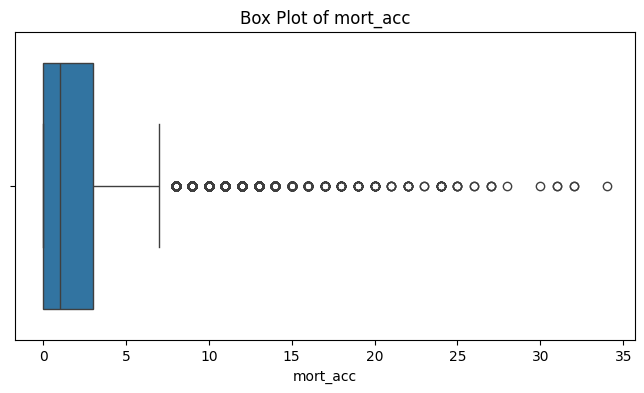

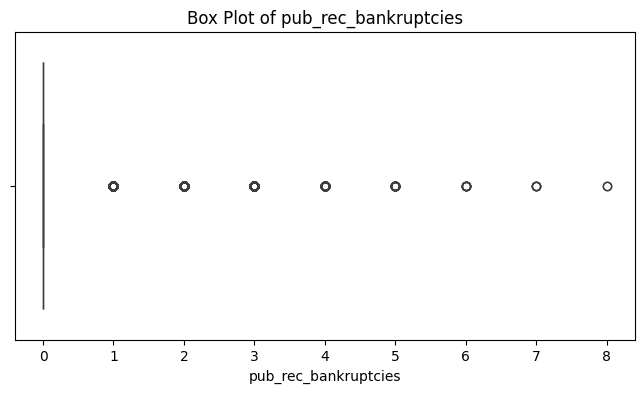

In [17]:
for col in num_cols:
    plots.plot_box(df, col)

In [18]:
print(cat_cols)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'initial_list_status', 'application_type', 'address'],
      dtype='object')


In [19]:
cat_many_cols = ['emp_title', 'purpose', 'title', 'address']

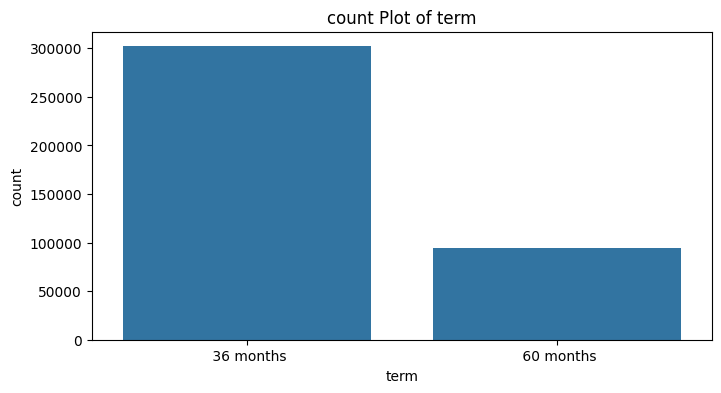

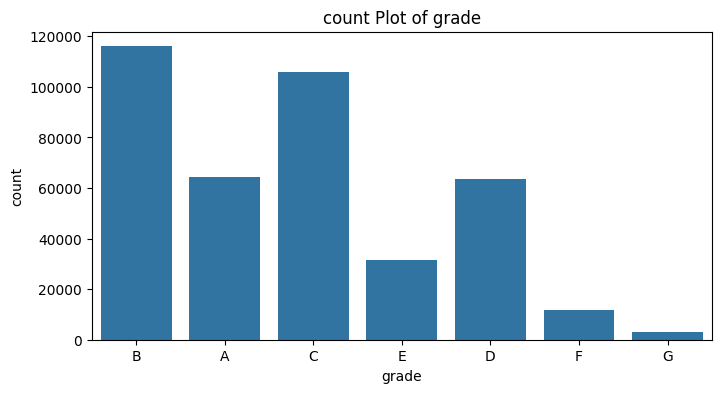

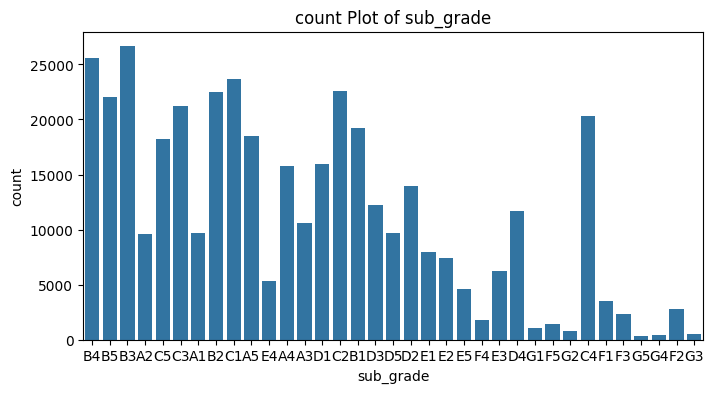

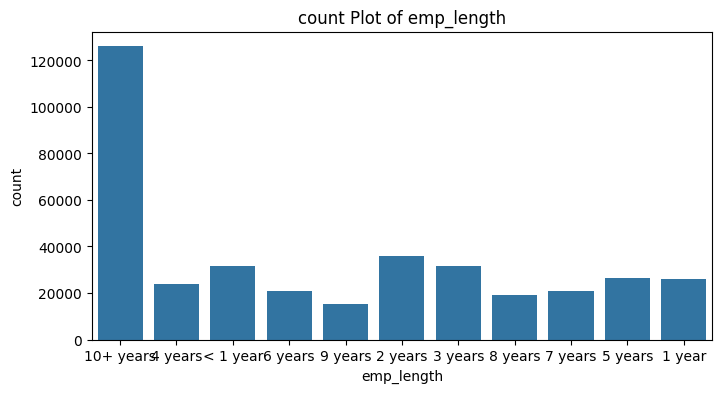

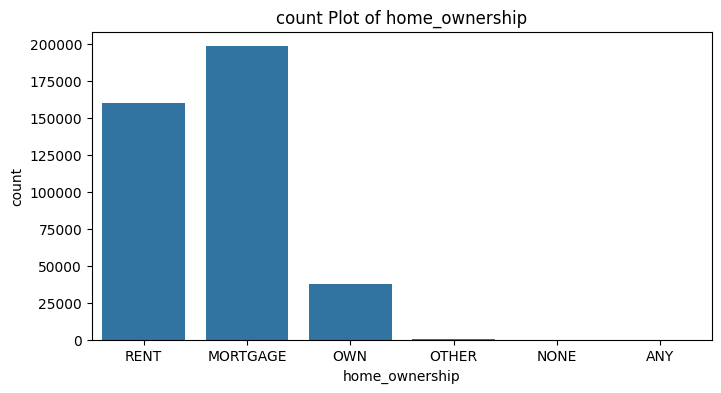

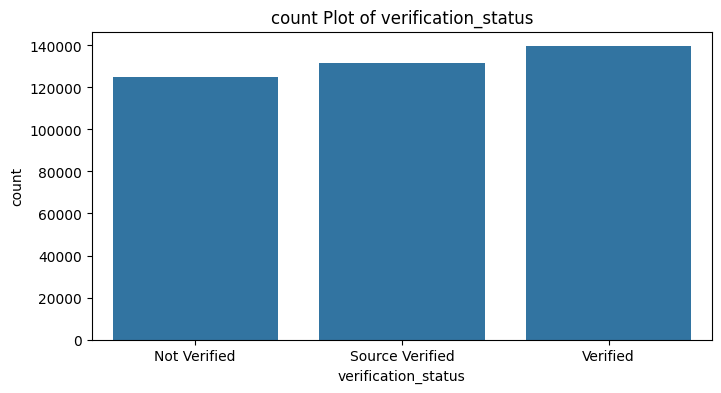

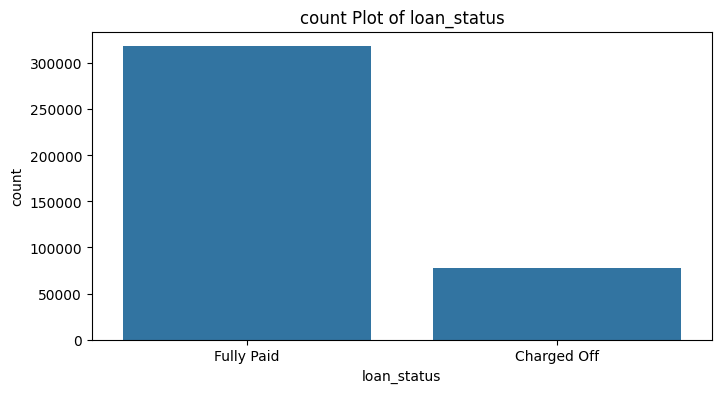

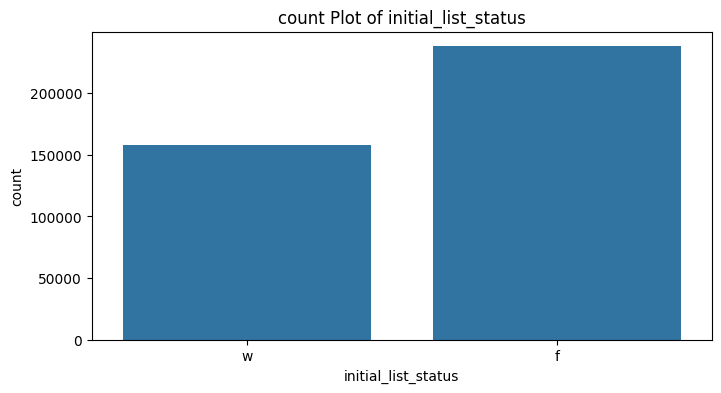

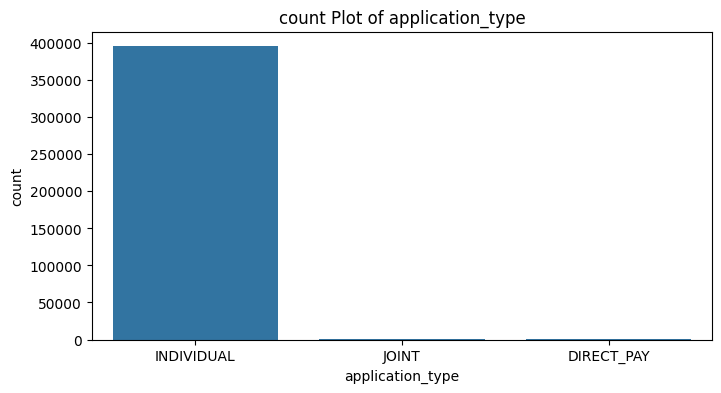

In [20]:
for col in cat_cols:
    if col not in cat_many_cols:
        plots.plot_count_column(df, col)

In [21]:
for col in date_cols:
    print(col)
    print(min(df[col]), max(df[col]))

issue_d
2007-06-01 00:00:00 2016-12-01 00:00:00
earliest_cr_line
1944-01-01 00:00:00 2013-10-01 00:00:00


In [22]:
for col in cat_many_cols:
    # print(col)
    print(df[col].value_counts().head(10))

emp_title
Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: count, dtype: int64
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
Name: count, dtype: int64
title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: count, dtype: int64
address
USS Smith\

In [23]:
for col in cat_many_cols:
    df[col] = df[col].str.strip().str.lower()

In [24]:
for col in cat_many_cols:
    print(df[col].nunique())
    print(df[col].value_counts().head(10))

149260
emp_title
manager             5833
teacher             5564
supervisor          2814
registered nurse    2733
sales               2512
driver              2385
owner               2261
rn                  2129
project manager     1836
office manager      1699
Name: count, dtype: int64
14
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
Name: count, dtype: int64
40139
title
debt consolidation           169027
credit card refinancing       51802
home improvement              17261
other                         12999
consolidation                  5862
major purchase                 5014
debt consolidation loan        3619
business                       3033
medical expenses               2824
credit card consolidation      2740
Name: co

In [25]:
df["purpose"].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

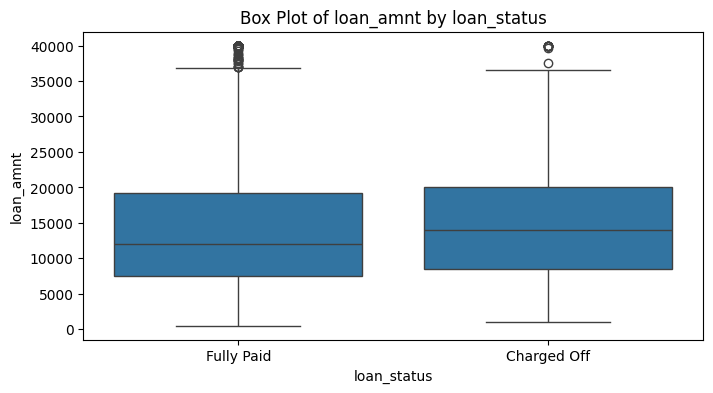

In [26]:
plots.plot_box_categorical(df, "loan_status", "loan_amnt")

In [29]:
# sns.countplot(df, x="term", hue="loan_status")

In [31]:
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'initial_list_status', 'application_type', 'address'],
      dtype='object')

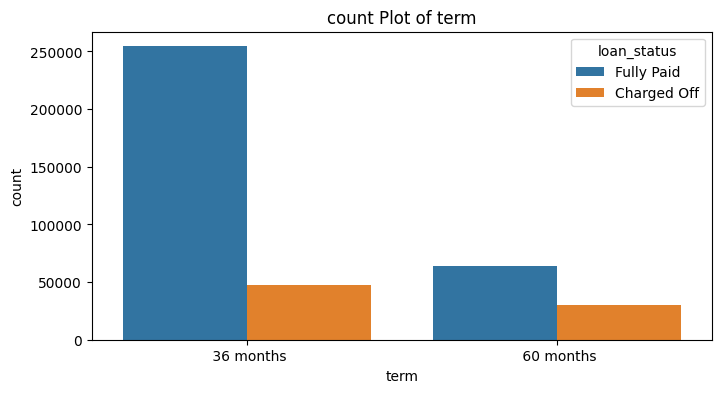

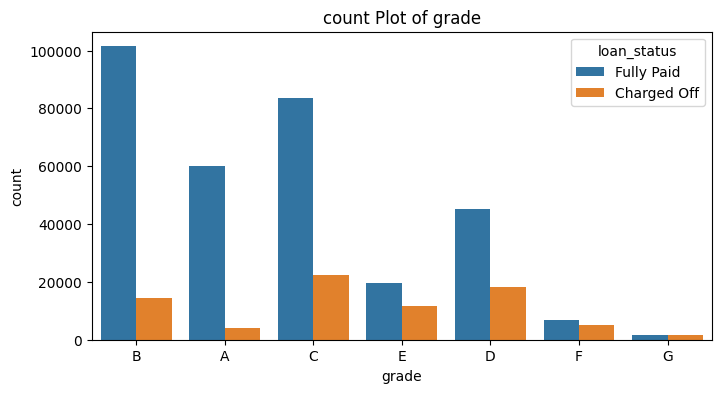

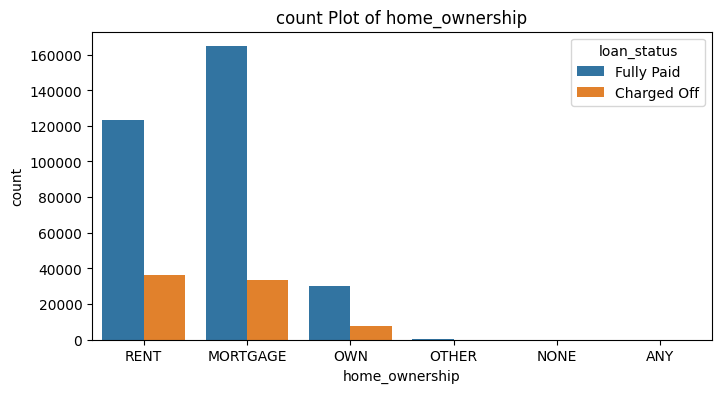

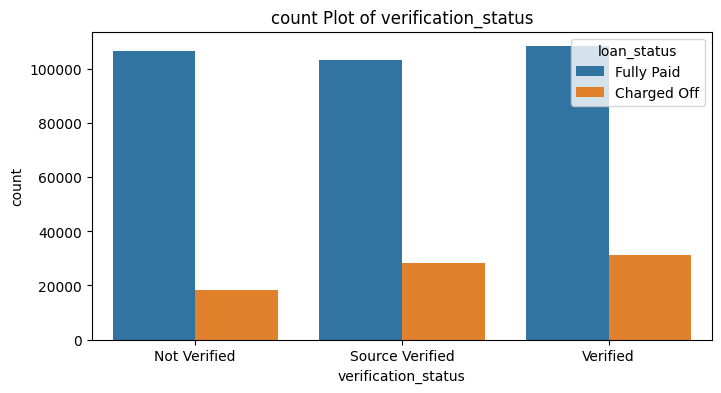

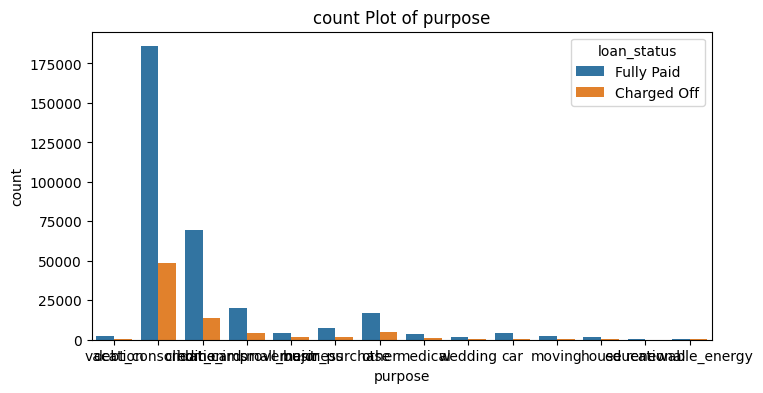

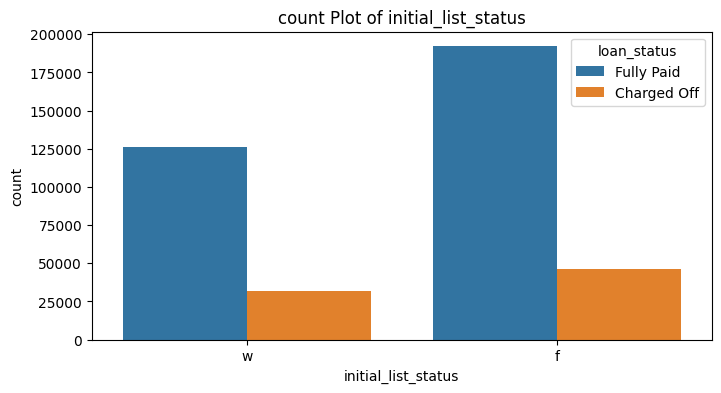

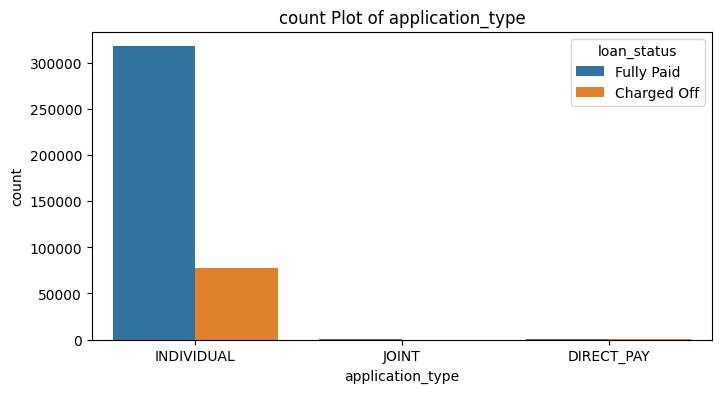

In [32]:
plots.plot_count_column(df, "term", hue="loan_status")
plots.plot_count_column(df, "grade", hue="loan_status")
plots.plot_count_column(df, "home_ownership", hue="loan_status")
plots.plot_count_column(df, "verification_status", hue="loan_status")
plots.plot_count_column(df, "purpose", hue="loan_status")
plots.plot_count_column(df, "initial_list_status", hue="loan_status")
plots.plot_count_column(df, "application_type", hue="loan_status")

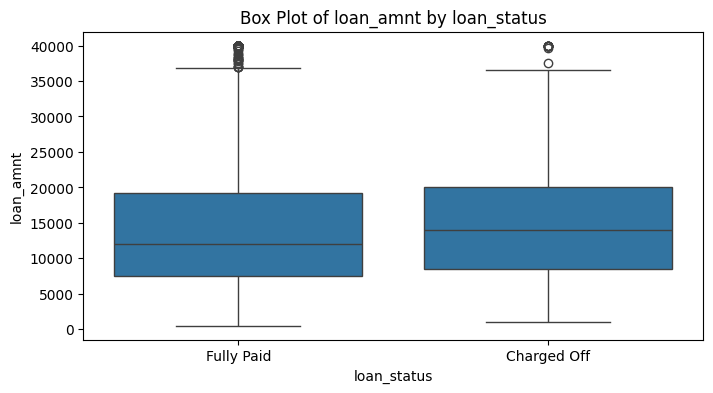

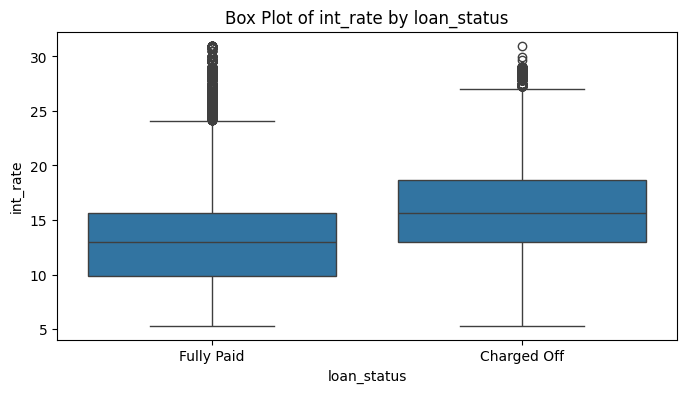

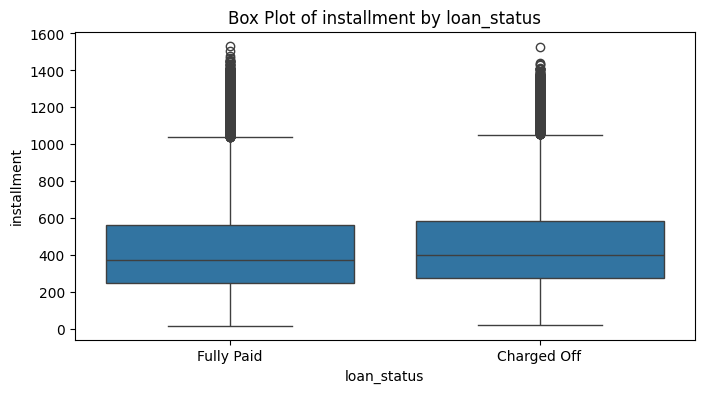

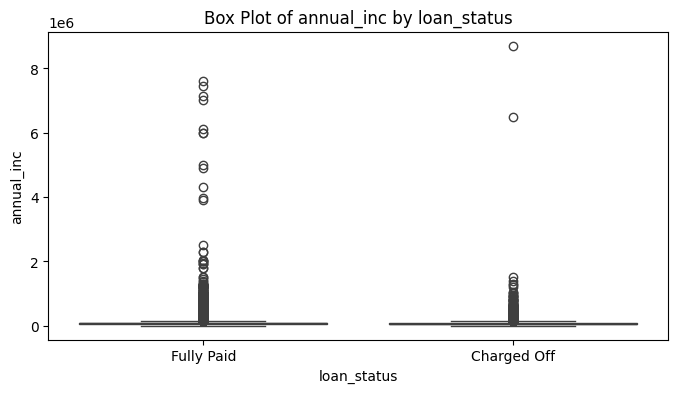

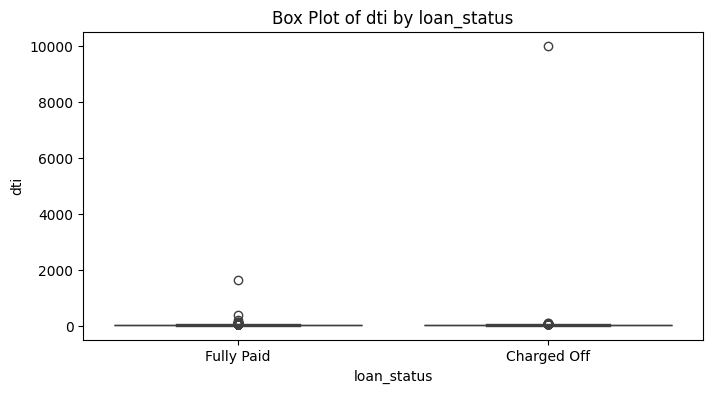

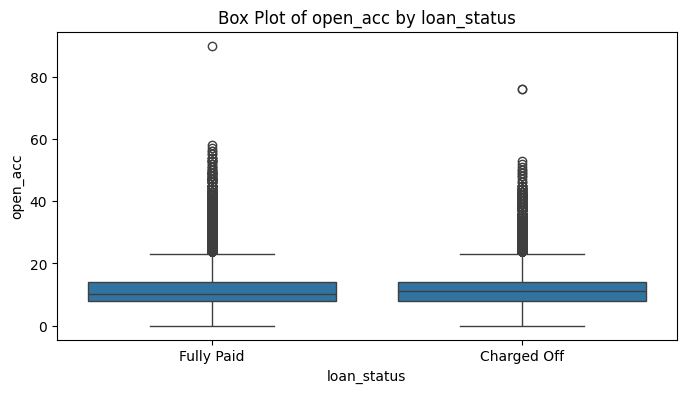

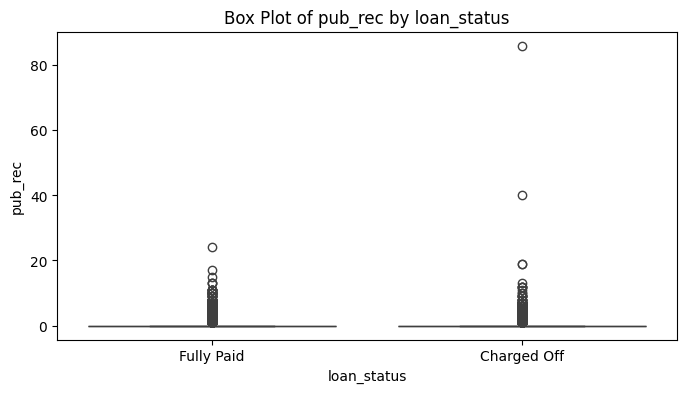

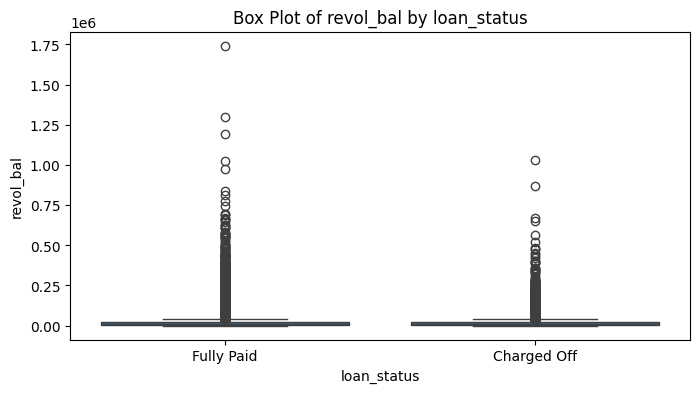

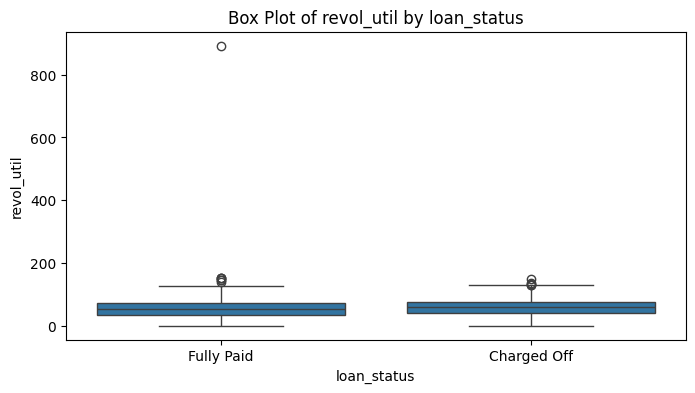

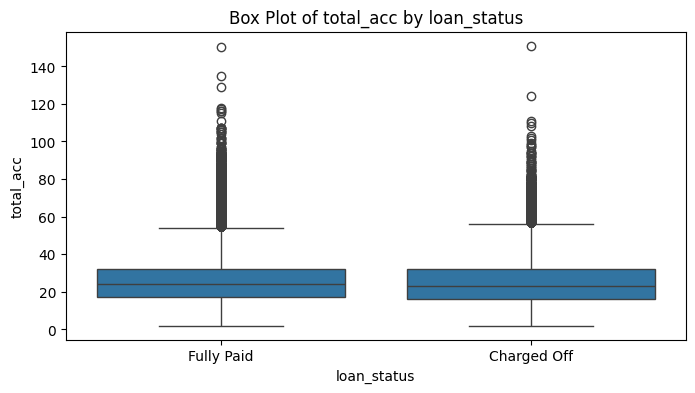

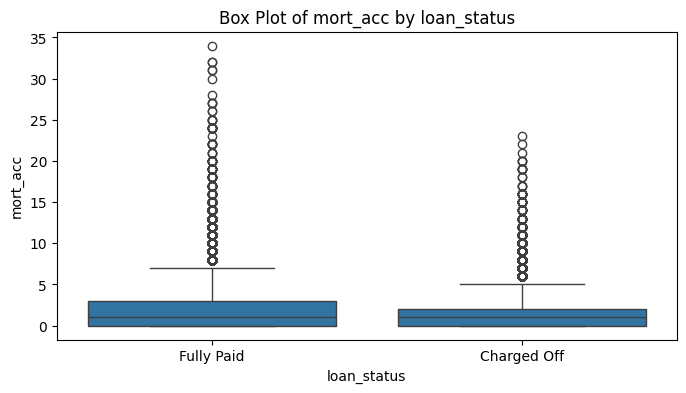

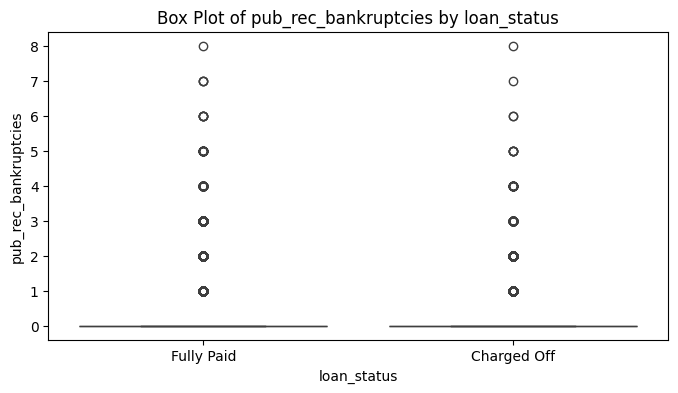

In [33]:
for col in num_cols:
    plots.plot_box_categorical(df, "loan_status", col)

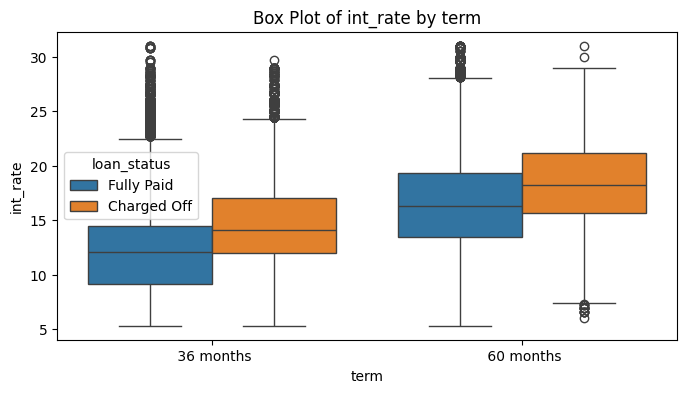

In [35]:
plots.plot_box_categorical(df, "term", "int_rate", hue="loan_status")

In [30]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [36]:
df.to_excel("../data/data_eda.xlsx")